**Final Project Aljabar Linier Lanjut**


Kelompok 5 (Kelas Rabu):


*   Jeffri - 2106705070
*   Laode Alif Ma’sum Sidrajat Raja Ika -  2106731213
*   Mikhael Morris Hapataran Siallagan - 2106731491

Link video penjelasan:
https://youtu.be/yAgPcpF4gzU










**Prediksi Human Development Index (HDI) dan Tingkat Inflasi Suatu Negara Berdasarkan Expected Years of Schooling, Mean Years of Schooling, Gross National Income per Capita,  dan Life Expectancy at Birth**

Kode ini bertujuan untuk melakukan prediksi terhadap inflation rate dan HDI (Human Development Index) berdasarkan 4 parameter yaitu Expected years of schooling, Mean years of schooling, Gross National Income per capita, dan Life expectancy at birth. Prediksi dilakukan menggunakan metode linear regression.

**Importing Data**

Pada percobaan ini kami menggunakan dua sumber data dalam bentuk .csv yaitu "Human Development Index and Components.csv" dan "ADO April 2023 - Inflation.csv". Langkah pertama adalah melakukan import data dari file csv ke tabel menggunakan library panda. Dikarenakan sebagian tipe data yang diperoleh dari file .csv merupakan object, maka perlu dilakukan konversi ke bentuk numeric agar dapat dilakukan perhitungan pada tahap-tahap selanjutnya.

In [ ]:
from numpy import array
from numpy import mean
from numpy import cov
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log as ln




hdiData = pd.read_csv('/content/data/Human Development Index and Components.csv' , encoding= 'unicode_escape')
hdiData.drop(columns=['Unnamed: 10', 'Unnamed: 11'], inplace=True)
hdiData['Expected years of schooling'] = pd.to_numeric(hdiData['Expected years of schooling'], errors='coerce')
hdiData['Mean years of schooling'] = pd.to_numeric(hdiData['Mean years of schooling'], errors='coerce')
hdiData['Gross national income (GNI) per capita'] = hdiData['Gross national income (GNI) per capita'].replace(',', '',  regex=True)
hdiData['Gross national income (GNI) per capita'] = pd.to_numeric(hdiData['Gross national income (GNI) per capita'], errors='coerce')
hdiData['Human Development Index (HDI) '] = pd.to_numeric(hdiData['Human Development Index (HDI) '], errors='coerce')

print(hdiData.dtypes)
hdiData.head()

HDI rank                                    int64
Country                                    object
HUMAN DEVELOPMENT                          object
Human Development Index (HDI)             float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GNI per capita rank minus HDI rank         object
HDI rank.1                                 object
dtype: object


,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66933.0,5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64660.0,6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55782.0,11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62607.0,6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49238.0,18,5


In [ ]:
inflationData = pd.read_csv('/content/data/ADO April 2023 - Inflation.csv', encoding = 'unicode_escape')
inflationData.drop(inflationData[inflationData['Year'] != '2021'].index, inplace = True)
print(inflationData.dtypes)
inflationData.head()

RegionalMember          object
Year                    object
Inflation              float64
Unit of Measurement     object
 Subregion              object
 Country Code           object
dtype: object


,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
3,Developing Asia,2021,2.6,%,NaN,NaN
10,Developing Asia excluding the PRC,2021,4.2,%,NaN,NaN
17,Caucasus and Central Asia,2021,9.0,%,Central Asia,NaN
24,Armenia,2021,7.2,%,Central Asia,ARM
31,Azerbaijan,2021,6.7,%,Central Asia,AZE


**About Dataset**

CONTENT :

Human Development Index (HDI):
A composite index measuring average achievement in three basic dimensions of human
development—a long and healthy life, knowledge and a decent standard of living.

Life expectancy at birth:
Number of years a newborn infant could expect to live if prevailing patterns of age-specific
mortality rates at the time of birth stay the same throughout the infant’s life.

Expected years of schooling:
Number of years of schooling that a child of school entrance age can expect to receive if prevailing
patterns of age-specific enrolment rates persist throughout the child’s life.

Gross national income (GNI)
per capita: Aggregate income of an economy generated by its production and its ownership of factors of production, less the incomes paid for the use of factors of production owned by the rest of the world,
converted to international dollars using PPP rates, divided by midyear population.

GNI per capita rank minus HDI rank:
Difference in ranking by GNI per capita and by HDI value. A negative value means that the country is
better ranked by GNI than by HDI value.

Year:
The year that the data is collected

Inflation:
Inflation rate during the time period

Subregion:
Subregion of the country


**Merge Table**

Setelah tipe data yang dibutuhkan telah dikonversi ke bentuk numeric, kedua tabel akan disatukan menggunakan inner join regionalMember dan Country sehingga negara-negara yang sama akan disatukan datanya berdasarkan tabel HDI dan Inflasi.

In [ ]:
mergedData = hdiData.merge(inflationData.rename(columns={'RegionalMember': 'Country'})
        , how = 'inner', on = 'Country')
mergedData.dropna(subset = ['Life expectancy at birth'], inplace = True)
mergedData.dropna(subset = ['Expected years of schooling'], inplace = True)
mergedData.dropna(subset = ['Mean years of schooling'], inplace = True)
mergedData.dropna(subset = ['Gross national income (GNI) per capita'], inplace = True)
mergedData.head(5)

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,12,Singapore,VERY HIGH,0.939,82.8,16.5,11.9,90919.0,-10,10,2021,2.3,%,Southeast Asia,SGP
1,51,Brunei Darussalam,VERY HIGH,0.829,74.6,14.0,9.2,64490.0,-42,49,2021,1.7,%,Southeast Asia,BRN
2,56,Kazakhstan,VERY HIGH,0.811,69.4,15.8,12.3,23943.0,1,59,2021,8.0,%,Central Asia,KAZ
3,62,Malaysia,VERY HIGH,0.803,74.9,13.3,10.6,26658.0,-8,61,2021,2.5,%,Southeast Asia,MYS
4,63,Georgia,VERY HIGH,0.802,71.7,15.6,12.8,14664.0,17,64,2021,9.6,%,Central Asia,GEO


**Plotting**

Plotting dilakukan untuk menggambarkan hubungan antara komponen-komponen pada tabel HDI dengan nilai HDI. Jenis plot yang digunakan pada plotting kali ini adalah scatter plot agar dapat menggambarkan persebaran data secara jelas.

HDI rank                                    int64
Country                                    object
HUMAN DEVELOPMENT                          object
Human Development Index (HDI)             float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GNI per capita rank minus HDI rank         object
HDI rank.1                                 object
Year                                       object
Inflation                                 float64
Unit of Measurement                        object
 Subregion                                 object
 Country Code                              object
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

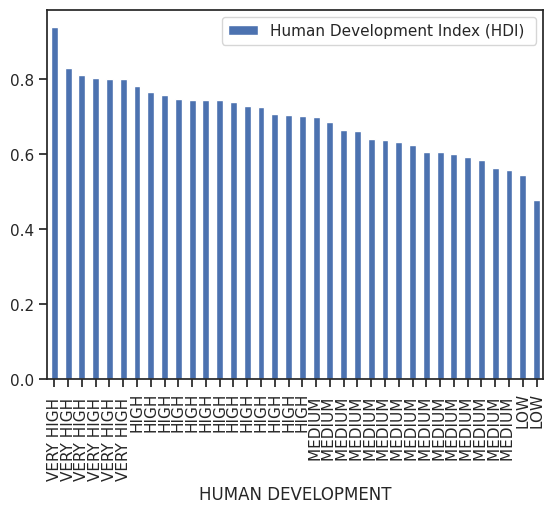

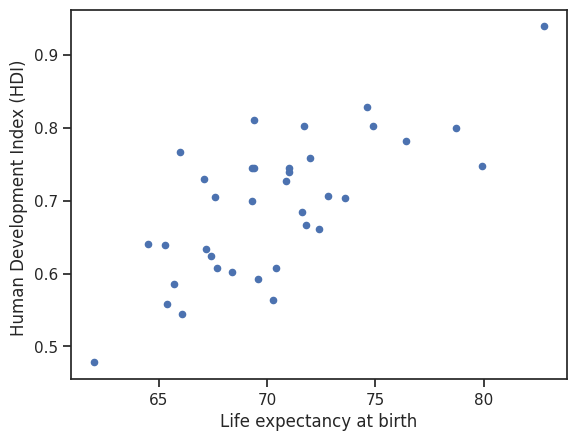

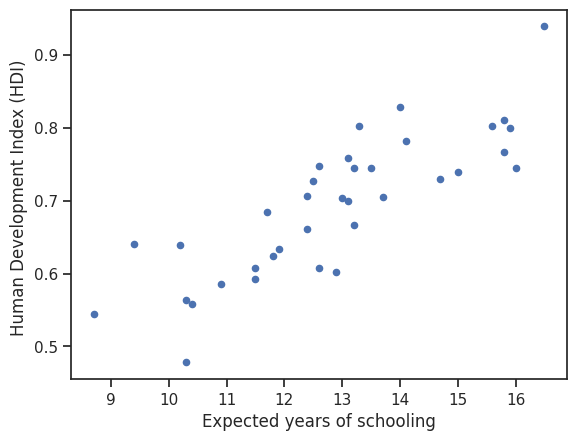

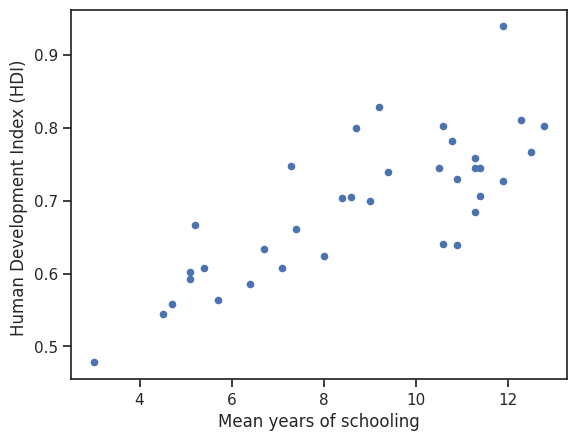

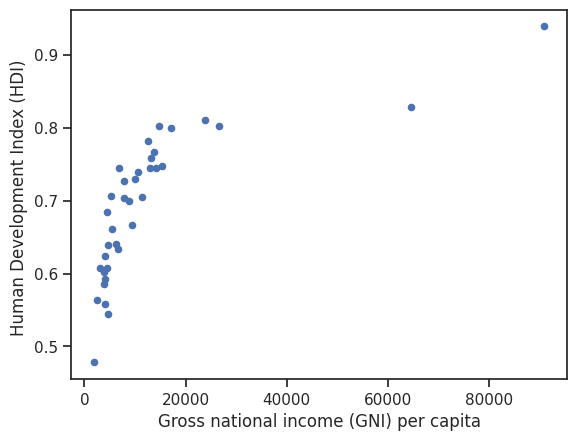

In [ ]:
from scipy import stats

print(mergedData.dtypes)
mergedData.plot(x = 'HUMAN DEVELOPMENT', y = 'Human Development Index (HDI) ', kind='bar')
plt.show
mergedData.plot(x = 'Life expectancy at birth', y = 'Human Development Index (HDI) ', kind='scatter')
plt.show
mergedData.plot(x = 'Expected years of schooling', y = 'Human Development Index (HDI) ', kind='scatter')
plt.show
mergedData.plot(x = 'Mean years of schooling', y = 'Human Development Index (HDI) ', kind='scatter')
plt.show
mergedData.plot(x = 'Gross national income (GNI) per capita', y = 'Human Development Index (HDI) ', kind='scatter')
plt.show


Berdasarkan plot di atas, terlihat bahwa life expectancy, expected years of schooling, mean years of schooling, serta gross national income per capita memiliki hubungan berbanding lurus terhadap Human Development Index (HDI) yang artinya semakin besar nilai dari keempat parameter tersebut, maka HDI nya juga akan lebih besar.

**Correlation**

Penentuan korelasi antar parameter dilakukan menggunakan library pearson sehingga dapat ditemukan variabel-variabel yang memiliki pengaruh terhadap HDI ataupun tingkat inflasi.

In [ ]:
pearson_coef, p_value = stats.pearsonr(mergedData['Life expectancy at birth'], mergedData['Human Development Index (HDI) '])
print("Life expectancy at birth & HDI correlation")
print("Pearson correlation: ", pearson_coef)
print("P value : ", p_value)

pearson_coef, p_value = stats.pearsonr(mergedData['Expected years of schooling'], mergedData['Human Development Index (HDI) '])
print("\nExpected years of schooling & HDI correlation")
print("Pearson correlation: ", pearson_coef)
print("P value : ", p_value)

pearson_coef, p_value = stats.pearsonr(mergedData['Mean years of schooling'], mergedData['Human Development Index (HDI) '])
print("\nMean years of schooling & HDI correlation")
print("Pearson correlation: ", pearson_coef)
print("P value : ", p_value)

pearson_coef, p_value = stats.pearsonr(mergedData['Gross national income (GNI) per capita'], mergedData['Human Development Index (HDI) '])
print("\nGross National Income & HDI correlation")
print("Pearson correlation: ", pearson_coef)
print("P value : ", p_value)

pearson_coef, p_value = stats.pearsonr(mergedData['Inflation'], mergedData['Human Development Index (HDI) '])
print("\nInflation & HDI correlation")
print("Pearson correlation: ", pearson_coef)
print("P value : ", p_value)

Life expectancy at birth & HDI correlation
Pearson correlation:  0.7175055788733027
P value :  8.450399431393389e-07

Expected years of schooling & HDI correlation
Pearson correlation:  0.8325130060221989
P value :  3.0683096356549524e-10

Mean years of schooling & HDI correlation
Pearson correlation:  0.7884965189304257
P value :  1.1267681179511556e-08

Gross National Income & HDI correlation
Pearson correlation:  0.7139922388527938
P value :  1.0114378331344717e-06

Inflation & HDI correlation
Pearson correlation:  0.008526684859633739
P value :  0.9606360680710849


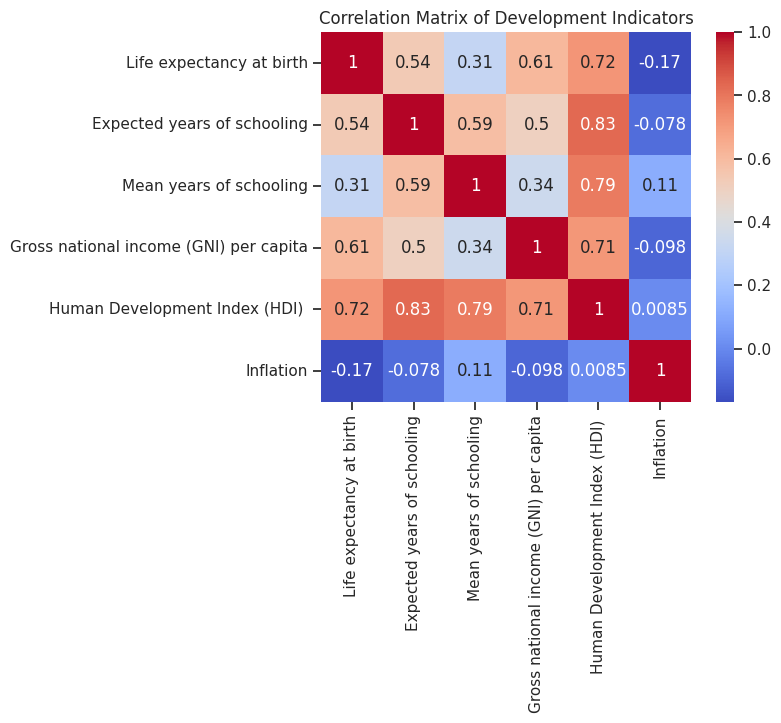

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the variables for correlation analysis
correlation_vars = ['Life expectancy at birth', 'Expected years of schooling',
                    'Mean years of schooling', 'Gross national income (GNI) per capita',
                    'Human Development Index (HDI) ', 'Inflation']

# Create a correlation matrix
correlation_matrix = mergedData[correlation_vars].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the plot
plt.title('Correlation Matrix of Development Indicators')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()

Seluruh parameter memiliki nilai korelasi yang berada pada range 0.71 - 0.83 yang berarti memiliki korelasi positif yang besar karena mendekati +1. Selain itu, nilai p value-nya juga lebih kecil dari 0.0001 yang menandakan bahwa keempat parameter memiliki tingkat kepastian yang tinggi. Berdasarkan kedua nilai tersebut, dapat disimpulkan bahwa life expectancy, expected years of schooling, mean years of schooling, dan gross national income memiliki korelasi yang kuat terhadap nilai HDI. Sementara itu, korelasi antara nilai HDI dan tingkat inflasi sangat kecil yaitu 0.008 dan p value yang mendekati nilai 1 yaitu 0.96 menandakan bahwa hubungan antara keduanya sangat lemah sehingga tidak dapat digunakan dalam melakukan prediksi menggunakan linear regression

**Normalization**

Melakukan normalisasi data, agar bentuk data sebelumnya yang range nilainya berbeda-beda dapat diubah menjadi dalam range yang sama yaitu 0-1 dengan menggunakan normalisasi berdasarkan nilai minimum dan maksimum. Hal ini diperlukan dalam pengolahan data kedepannya seperti Linear Regression.

In [ ]:

mergedData["Inflation"] = (mergedData["Inflation"] - mergedData["Inflation"].min())/(mergedData["Inflation"].max() -mergedData["Inflation"].min())
mergedData["Life expectancy at birth"] = (mergedData["Life expectancy at birth"] - mergedData["Life expectancy at birth"].min())/(mergedData["Life expectancy at birth"].max() -mergedData["Life expectancy at birth"].min())
mergedData["Expected years of schooling"] = (mergedData["Expected years of schooling"] - mergedData["Expected years of schooling"].min())/(mergedData["Expected years of schooling"].max() -mergedData["Expected years of schooling"].min())
mergedData["Mean years of schooling"] = (mergedData["Mean years of schooling"] - mergedData["Mean years of schooling"].min())/(mergedData["Mean years of schooling"].max() -mergedData["Mean years of schooling"].min())
mergedData["Gross national income (GNI) per capita"] = (mergedData["Gross national income (GNI) per capita"] - mergedData["Gross national income (GNI) per capita"].min())/(mergedData["Gross national income (GNI) per capita"].max() -mergedData["Gross national income (GNI) per capita"].min())
mergedData.drop(columns=['Unit of Measurement'], inplace=True)
mergedData.head(10)

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Year,Inflation,Subregion,Country Code
0,12,Singapore,VERY HIGH,0.939,1.000000,1.000000,0.908163,1.000000,-10,10,2021,0.341935,Southeast Asia,SGP
1,51,Brunei Darussalam,VERY HIGH,0.829,0.605769,0.679487,0.632653,0.703362,-42,49,2021,0.303226,Southeast Asia,BRN
2,56,Kazakhstan,VERY HIGH,0.811,0.355769,0.910256,0.948980,0.248263,1,59,2021,0.709677,Central Asia,KAZ
3,62,Malaysia,VERY HIGH,0.803,0.620192,0.589744,0.775510,0.278736,-8,61,2021,0.354839,Southeast Asia,MYS
4,63,Georgia,VERY HIGH,0.802,0.466346,0.884615,1.000000,0.144116,17,64,2021,0.812903,Central Asia,GEO
5,66,Thailand,VERY HIGH,0.800,0.802885,0.923077,0.581633,0.170672,6,64,2021,0.270968,Southeast Asia,THA
6,73,Sri Lanka,HIGH,0.782,0.692308,0.692308,0.795918,0.120703,21,75,2021,0.580645,South Asia,LKA
7,80,Palau,HIGH,0.767,0.192308,0.910256,0.969388,0.134632,5,80,2021,0.225806,The Pacific,PLW
8,85,Armenia,HIGH,0.759,0.480769,0.564103,0.846939,0.127213,4,87,2021,0.658065,Central Asia,ARM
9,90,Maldives,HIGH,0.747,0.860577,0.500000,0.438776,0.152915,-14,97,2021,0.225806,South Asia,MDV


**Regression**

Linear Regression merupakan sebuah metode untuk melihat hubungan antara dua atau lebih variabel sehingga membentuk sebuah linear function yang dapat digunakan untuk melakukan prediksi berdasarkan data yang telah di training. Pada pengolahan data ini akan menggunakan Multiple Linear Regression.

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


sehingga dapat digunakan pada linearr function untuk menghitung prediksi.

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$



**Multiple Linear Regression antara GNI dan Inflation**

Pada bagian ini kita akan mencoba untuk melakukan linear regression untuk melihat apakah hubungan antara variabel predictor (Life expectancy at birth, Expected years of schooling, Mean years of schooling, Gross national income (GNI) per capita) dan variabel response (Inflation).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()

z = mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']]
inf_train = lm.fit(z, mergedData['Inflation'])


print('The R-square is: ', lm.score(z, mergedData['Inflation']))
#trainmse = mean_squared_error(mergedData['Inflation'], inf_train)
inf_predict = lm.predict(z)


The R-square is:  0.06791766487873574


Disini kita menghitung R-square untuk mengukur seberapa akurat antara data dengan fitted regression linenya.

In [ ]:
inf_predict = lm.predict(z)

mse = mean_squared_error(mergedData['Inflation'], inf_predict)
print('The mean square error of inflation and predicted value is: ', mse)

print('The mean square error of inflation and predicted value using multifit is: ', mean_squared_error(mergedData['Inflation'], inf_predict))



The mean square error of inflation and predicted value is:  0.0449415913309778
The mean square error of inflation and predicted value using multifit is:  0.0449415913309778


Sedangkan untuk MSE atau Mean Squared Error digunakan untuk mengukur error atau selisih perbedaan antara nilai sebenarnya dan hasil prediksi.

In [ ]:
lm.intercept_

0.4842769501962232

In [ ]:
lm.coef_

array([-0.17649326, -0.1077295 ,  0.19522852, -0.02076333])

<ipython-input-108-223eeaa97efc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inflation'], hist=False, kde=True, label='Inflation')
<ipython-input-108-223eeaa97efc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Predicted Inflation'], hist=False, kde=True, l

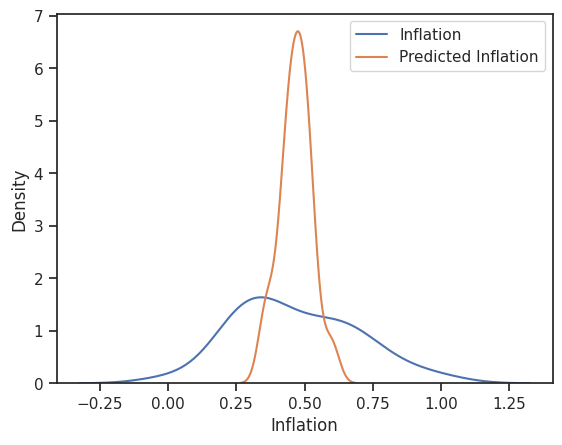

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Membuat DataFrame dengan inflation asli dan predicted inflation
data = pd.DataFrame({'Inflation': mergedData['Inflation'], 'Predicted Inflation': inf_predict})

# Mengatur plot style
sns.set(style="ticks")

# Membuat distribution plot
sns.distplot(data['Inflation'], hist=False, kde=True, label='Inflation')
sns.distplot(data['Predicted Inflation'], hist=False, kde=True, label='Predicted Inflation')

# Menampilkan label dan legenda
plt.xlabel('Inflation')
plt.ylabel('Density')
plt.legend()

# Menampilkan plot
plt.show()

Setelah melakukan training dan prediksi terhadap GNI dengan Inflation, dapat dilihat bahwa tidak ada kecocokan sama sekali antara variabel GNI dan variabel Inflation.

Hal ini juga didukung saat melakukan perhitungan korelasi, hubungan antara HDI dan Inflation memiliki pearson correlation yang sangat rendah, yaitu 0.00852.

Dimana untuk mengatakan bahwa dua variabel itu memiliki korelasi, nilai pearson correlation harus mendekati nilai 1, sehingga menyebabkan ketidaksesuaian data yang dimana untuk melakukan regresi diperlukan korelasi.

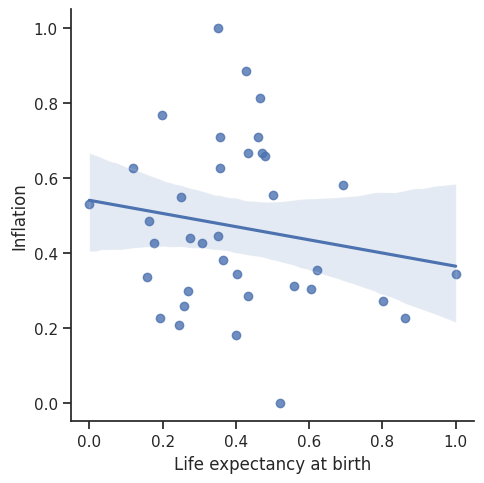

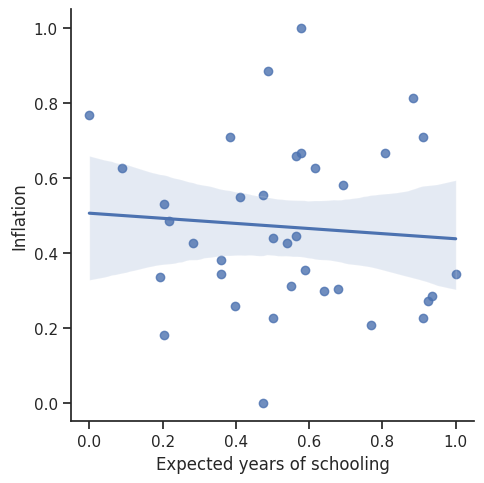

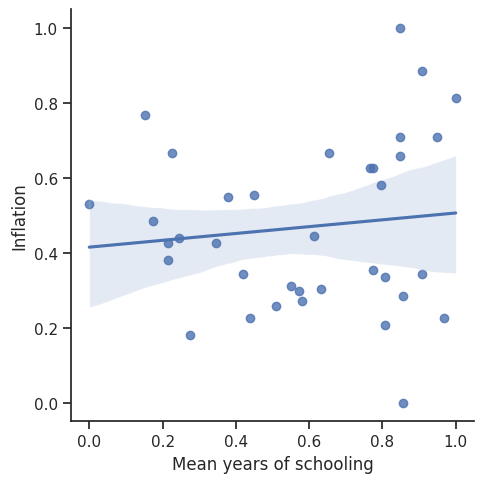

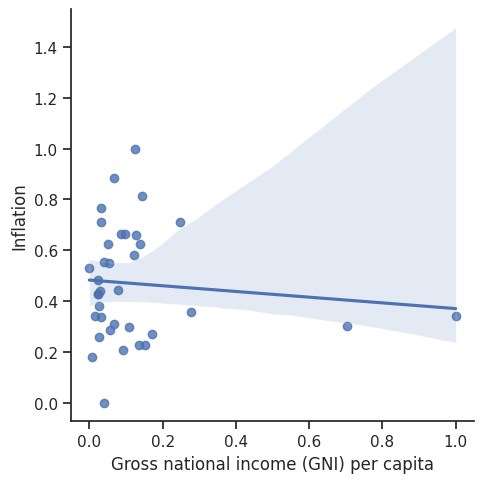

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame baru dengan variabel independen dan variabel dependen
data = mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'Inflation']]

# Mengatur plot style
sns.set(style="ticks")

# Menampilkan regresi plot dengan prediksi inflasi
sns.lmplot(x='Life expectancy at birth', y='Inflation', data=data)
sns.lmplot(x='Expected years of schooling', y='Inflation', data=data)
sns.lmplot(x='Mean years of schooling', y='Inflation', data=data)
sns.lmplot(x='Gross national income (GNI) per capita', y='Inflation', data=data)

# Menampilkan plot
plt.show()


Hal ini juga membuat regression plot menjadi acak-acakan karena memiliki tingkat korelasi yang sangat rendah dan dapat disimpulkan bahwa HDI dan Inflation tidak memiliki hubungan apapun.

Oleh karena itu, kami memutuskan untuk melakukan Linear Regression terhadap 4 variabel GNI sebagai variabel predictor , yaitu (Life expectancy at birth, Expected years of schooling, Mean years of schooling, Gross national income (GNI) per capita) dengan variabel response (Inflation).

In [ ]:
mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'Inflation']].corr()


,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Inflation
Life expectancy at birth,1.000000,0.535676,0.313818,0.608633,-0.168143
Expected years of schooling,0.535676,1.000000,0.587019,0.504875,-0.077648
Mean years of schooling,0.313818,0.587019,1.000000,0.344755,0.114900
Gross national income (GNI) per capita,0.608633,0.504875,0.344755,1.000000,-0.097801
Inflation,-0.168143,-0.077648,0.114900,-0.097801,1.000000


Kita akan menggunakan metode dan langkah-langkah yang sama seperti pada percobaan HDI dan Inflation.

In [ ]:
# #making comparison table between
# cp = mergedData
# cp.insert(len(mergedData.columns), "Predicted Inflation", lm.predict(z))
# cp

# Membuat salinan DataFrame mergedData
cp = mergedData.copy()

# Menambahkan kolom "Predicted Inflation" dengan nilai prediksi
cp.insert(len(mergedData.columns), "Predicted Inflation", lm.predict(z))

# Mengubah nilai prediksi menjadi persentase
cp["Predicted Inflation"] = cp["Predicted Inflation"]

# Menampilkan tabel perbandingan
print(cp.to_string(index=False, justify="center"))



 HDI rank      Country      HUMAN DEVELOPMENT  Human Development Index (HDI)   Life expectancy at birth  Expected years of schooling  Mean years of schooling  Gross national income (GNI) per capita GNI per capita rank minus HDI rank HDI rank.1 Year  Inflation    Subregion    Country Code  Predicted Inflation
    12            Singapore     VERY HIGH                  0.939                       1.000000                   1.000000                   0.908163                         1.000000                               -10                     10     2021  0.341935  Southeast Asia      SGP            0.356590      
    51    Brunei Darussalam     VERY HIGH                  0.829                       0.605769                   0.679487                   0.632653                         0.703362                               -42                     49     2021  0.303226  Southeast Asia      BRN            0.413070      
    56           Kazakhstan     VERY HIGH                  0.811      

Melakukan training, predict dan juga menghitung R-Square dan MSE-nya.

In [ ]:
lm.fit(z, mergedData['Human Development Index (HDI) '])

print('The R-square is: ', lm.score(z, mergedData['Human Development Index (HDI) ']))

hdi_predict = lm.predict(z)


The R-square is:  0.9688380676635705


In [ ]:
mse = mean_squared_error(mergedData['Human Development Index (HDI) '], hdi_predict)
print('The mean square error of HDI and predicted value is: ', mse)

print('The mean square error of HDI and predicted value using multifit is: ', mean_squared_error(mergedData['Human Development Index (HDI) '], hdi_predict))



The mean square error of HDI and predicted value is:  0.0002822546602843091
The mean square error of HDI and predicted value using multifit is:  0.0002822546602843091


In [ ]:
lm.intercept_

0.4774231027540121

In [ ]:
lm.coef_

array([0.12009006, 0.11758896, 0.15117827, 0.12231229])

<ipython-input-116-3bf96d03312f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HDI Value'], hist=False, kde=True, label='HDI Value')
<ipython-input-116-3bf96d03312f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Predicted HDI'], hist=False, kde=True, label='Pr

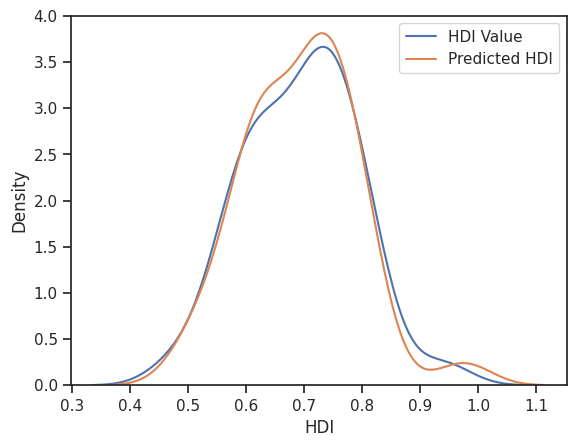

In [ ]:
# Membuat DataFrame dengan HDI asli dan predicted HDI
data = pd.DataFrame({'HDI Value': mergedData['Human Development Index (HDI) '], 'Predicted HDI': hdi_predict})

# Mengatur plot style
sns.set(style="ticks")

# Membuat distribution plot
sns.distplot(data['HDI Value'], hist=False, kde=True, label='HDI Value')
sns.distplot(data['Predicted HDI'], hist=False, kde=True, label='Predicted HDI')

# Menampilkan label dan legenda
plt.xlabel('HDI')
plt.ylabel('Density')
plt.legend()

# Menampilkan plot
plt.show()

Jika dilihat, grafik perbandingan antara HDI value sebenarnya dan predicted HDI memiliki bentukan dan garis yang mirip-mirip sehingga dapat dikatakan bahwa prediksi yang diperoleh memiliki error yang sangat kecil.

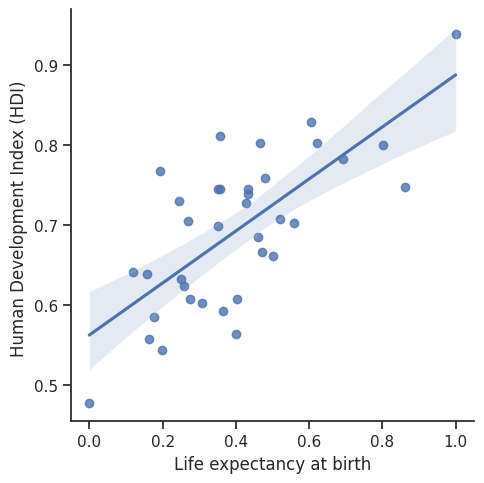

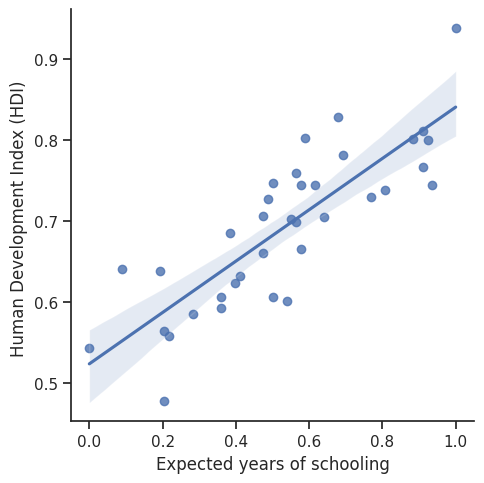

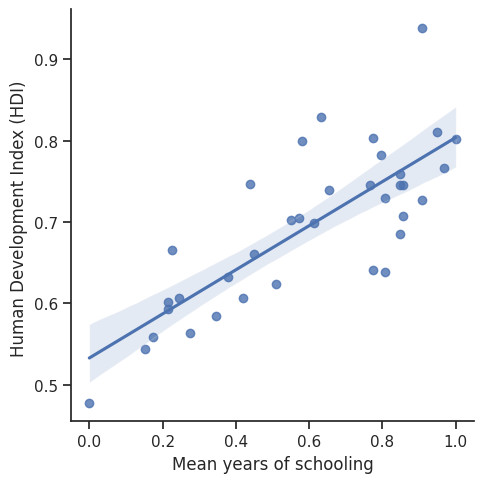

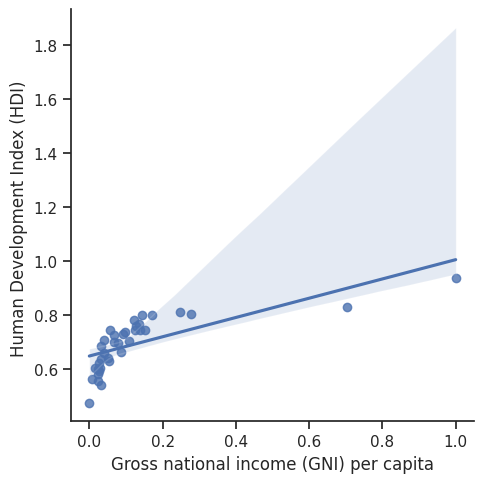

In [ ]:
# Membuat DataFrame baru dengan variabel independen dan variabel dependen
data = mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'Human Development Index (HDI) ']]

# Mengatur plot style
sns.set(style="ticks")

# Menampilkan regresi plot dengan prediksi inflasi
sns.lmplot(x='Life expectancy at birth', y='Human Development Index (HDI) ', data=data)
sns.lmplot(x='Expected years of schooling', y='Human Development Index (HDI) ', data=data)
sns.lmplot(x='Mean years of schooling', y='Human Development Index (HDI) ', data=data)
sns.lmplot(x='Gross national income (GNI) per capita', y='Human Development Index (HDI) ', data=data)

# Menampilkan plot
plt.show()


Scatter plot di atas menunjukkan bahwa nilai-nilainya tidak memiliki persebaran yang terlalu jauh yang menandakan tingkat errornya cukup kecil sehingga dapat dikatakan hubungan keduanya adalah good fit.

In [ ]:
mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'Human Development Index (HDI) ']].corr()

,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development Index (HDI)
Life expectancy at birth,1.000000,0.535676,0.313818,0.608633,0.717506
Expected years of schooling,0.535676,1.000000,0.587019,0.504875,0.832513
Mean years of schooling,0.313818,0.587019,1.000000,0.344755,0.788497
Gross national income (GNI) per capita,0.608633,0.504875,0.344755,1.000000,0.713992
Human Development Index (HDI),0.717506,0.832513,0.788497,0.713992,1.000000


Terakhir kita akan melakukan perbandingan tabel antara nilai HDI sebenarnya dengan hasil Predicted HDI. Dapat dilihat, contoh pada negara Singapore memiliki actual HDI yaitu 0.939 dan Predicted HDInya adalah 0.974709. Yang dimana nilai prediksi mendekati nilai sebenarnya dan dapat dikatakan bahwa Linear Regressionnya berhasil.

In [ ]:
# Membuat salinan DataFrame mergedData
hdiCompare = mergedData.copy()

# Menambahkan kolom "Predicted Inflation" dengan nilai prediksi
hdiCompare.insert(4, "Predicted HDI", lm.predict(z))

# Mengubah nilai prediksi menjadi persentase
hdiCompare["Predicted HDI"] = hdiCompare["Predicted HDI"]

# Menampilkan tabel perbandingan
print(hdiCompare.to_string(index=False, justify="center"))


 HDI rank      Country      HUMAN DEVELOPMENT  Human Development Index (HDI)   Predicted HDI  Life expectancy at birth  Expected years of schooling  Mean years of schooling  Gross national income (GNI) per capita GNI per capita rank minus HDI rank HDI rank.1 Year  Inflation    Subregion    Country Code
    12            Singapore     VERY HIGH                  0.939                 0.974709             1.000000                   1.000000                   0.908163                         1.000000                               -10                     10     2021  0.341935  Southeast Asia      SGP     
    51    Brunei Darussalam     VERY HIGH                  0.829                 0.811743             0.605769                   0.679487                   0.632653                         0.703362                               -42                     49     2021  0.303226  Southeast Asia      BRN     
    56           Kazakhstan     VERY HIGH                  0.811                 0.80101

**Model Evaluation**

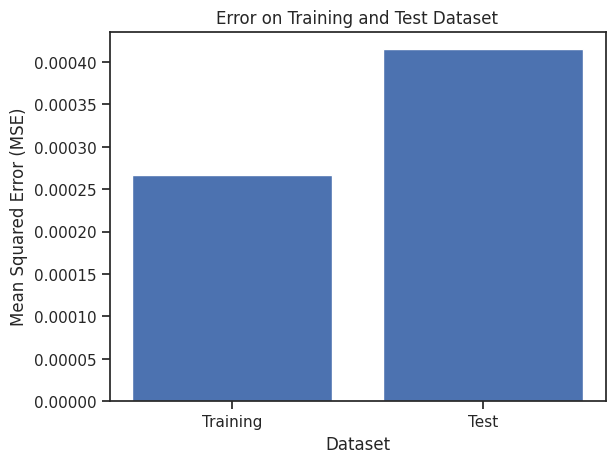

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

z = mergedData[['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']]
y = mergedData['Human Development Index (HDI) ']

# Split data menjadi data pelatihan dan data pengujian
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.3, random_state=0)

# Inisialisasi model
lm = LinearRegression()

# Pelatihan model menggunakan data pelatihan
lm.fit(z_train, y_train)


# Evaluasi model pada data pelatihan
train_predict = lm.predict(z_train)
train_mse = mean_squared_error(y_train, train_predict)

# Evaluasi model pada data pengujian
test_predict = lm.predict(z_test)
test_mse = mean_squared_error(y_test, test_predict)

# Plotting error pada data pelatihan dan data pengujian
plt.bar(['Training', 'Test'], [train_mse, test_mse])
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error on Training and Test Dataset')
plt.show()

Berdasarkan bar plot di atas, terlihat bahwa performa pada training lebih baik dibandingkan performa pada saat testing karena MSE training lebih kecil dibandingkan MSE testing meskipun persentase errornya sangat kecil. Oleh karena itu, dapat disimpulkan bahwa model yang dihasilkan sedikit mengalami overfitting.

**Kesimpulan**


*   Berdasarkan hasil percobaan, dapat disimpulkan bahwa tidak ada hubungan yang signifikan antara HDI (Human Development Index) dengan tingkat inflasi sehingga tidak dapat dilakukan prediksi tingkat inflasi berdasarkan HDI.

*   Keempat parameter pendukung HDI yaitu Expected years of schooling, Mean years of schooling, Gross National Income per capita, dan Life expectancy at birth terbukti memiliki hubungan yang kuat terhadap HDI sehingga dapat digunakan untuk memprediksi nilai HDI dengan cukup akurat.

*   Model training dan test mengalami overfitting karena MSE trainingnya lebih rendah dibanding MSE testing-nya meskipun tingkat errornya cukup kecil.


